
# Project: Investigate a Dataset - [TMDB-Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


The Dataset used for this anaysis is TMDB_movie. This Dataset has about 10,000 movies collected from The Movie Database(TMDb), including user ratings and revenue.

This database contains the following features:-

- id - A unique identifier for each movie.
- imdb_id - A unique identifier for each movie on IMDB.
- cast - The name of lead and supporting actors.
- director - the director of the movie
- budget - The budget in which the movie was made.
- genre - The genre of the movie, Action, Comedy ,Thriller etc.
- homepage - A link to the homepage of the movie.
- keywords - The keywords or tags related to the movie.
- original_title - The title of the movie before translation or adaptation.
- overview - A brief description of the movie.
- popularity - A numeric quantity specifying the movie popularity.
- production_companies - The production house of the movie.
- production_countries - The country in which it was produced.
- release_date - The date on which it was released.
- revenue - The worldwide revenue generated by the movie.
- runtime - The running time of the movie in minutes.
- tagline - Movie's tagline.
- vote_average - average ratings the movie recieved.
- budget_adj - shows the budget associated movie in terms of 2010 dollars.
- revenue_adj - shows the revenue associated movie in terms of 2010 dollars.




In [13]:
# Importing required python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

In [9]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> In this section we will do the following:
* load in the data,
* check for cleanliness,
* Then trim and clean your dataset for analysis. 

In [14]:
# Load your data 

movies_df = pd.read_csv('tmdb-movies.csv')
movies_df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [15]:
#check the number of rows and columns of the movies dataframe
movies_df.shape

(10866, 21)

This shows there are 10866 rows and 21 columns in the movies dataset

In [16]:
#check the information/description of the dataset's columns
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

- imdb_id will be removed, because its in string i.e object datatype, will still leave 'id' which is in integer.
- still keep popularity,budget and revenue fields which is useful for the analysis.
- original_title, cast, home_page, director will leave this for now
- tagline, keywords, overview, homepage, vote_average, budget_adj, revenue_adj will be deleted, because the data here are not useful for the analysis.
- release_date and release_year are also useful fields, but release date field datatype will be converted from object to datetime object.


In [17]:
#check for duplicates
movies_df.duplicated().sum()

1

Yes, we do have duplicates, lets check and drop it


### Data Cleaning
 

In this Stage, we will do the following:
- Delete the rows that have missing values.
- Delete the Duplicated rows
- Convert the release_date field to Datetime object
- Delete the unused column from the dataset
- Checking the fields/columns to be sure they have the right datatype

In [19]:
#identify duplicate row
view_duplicates = movies_df[movies_df.duplicated()]
#view duplicates row
view_duplicates

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [20]:
# drop duplicated row
movies_df.drop([2090], axis=0, inplace=True)

In [21]:
#check if row has been dropped
movies_df.duplicated().sum()

0

In [12]:
#checking for missing values
movies_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [22]:
#dropping columns that are not useful
movies_df.drop(['imdb_id','homepage','tagline','keywords','overview','budget_adj','revenue_adj'], axis=1, inplace=True)
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 1.2+ MB


In [23]:
#check for the null row
movies_df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [25]:
#drop all the columns with missing values
movies_df.dropna(how = 'any', inplace=True)

In [26]:
#check
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 14 columns):
id                      9772 non-null int64
popularity              9772 non-null float64
budget                  9772 non-null int64
revenue                 9772 non-null int64
original_title          9772 non-null object
cast                    9772 non-null object
director                9772 non-null object
runtime                 9772 non-null int64
genres                  9772 non-null object
production_companies    9772 non-null object
release_date            9772 non-null object
vote_count              9772 non-null int64
vote_average            9772 non-null float64
release_year            9772 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 1.1+ MB


In [27]:
#check if there are still missing values
movies_df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

### Convert Release_date Column to DateTime Object

In [28]:
#convert datatype to Datetime Object

movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

In [29]:
#check changes

movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 14 columns):
id                      9772 non-null int64
popularity              9772 non-null float64
budget                  9772 non-null int64
revenue                 9772 non-null int64
original_title          9772 non-null object
cast                    9772 non-null object
director                9772 non-null object
runtime                 9772 non-null int64
genres                  9772 non-null object
production_companies    9772 non-null object
release_date            9772 non-null datetime64[ns]
vote_count              9772 non-null int64
vote_average            9772 non-null float64
release_year            9772 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)
memory usage: 1.1+ MB


### Check if the Dataset contains runtime of Zero or less than Zero

In [33]:
#checking if the dataset contains runtime of zero or less than zero

movie_runtime = movies_df['runtime'] == 0
movies_df[movie_runtime].shape, movies_df[movie_runtime].index.values

((13, 14),
 array([  92,  334,  445,  486, 1289, 1293, 3329, 3857, 4944, 5695, 5920,
        5938, 6934]))

In [32]:
#check 

movies_df[movie_runtime]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
92,370687,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,2015-12-19,11,5.4,2015
334,361931,0.357654,0,0,Ronaldo,Cristiano Ronaldo,Anthony Wonke,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",2015-11-09,80,6.5,2015
445,353345,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,Steven R. Monroe,0,Horror,WT Canada Productions,2015-10-09,52,5.0,2015
486,333653,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,Nancy Savoca,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,2015-04-05,11,5.4,2015
1289,286372,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,Michael G. Bartlett,0,Thriller|Horror|Mystery,Tiberius Film,2014-10-20,16,3.4,2014
1293,286256,0.036904,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,Mauro Lima,0,Documentary|Drama|Music,Globo Filmes,2014-10-30,14,6.0,2014
3329,20414,0.082898,0,0,"Grande, grosso e Verdone",Carlo Verdone|Claudia Gerini|Eva Riccobono|Vit...,Carlo Verdone,0,Family,Filmauro,2008-03-07,35,5.3,2008
3857,289097,0.095583,0,0,Cell 213,Bruce Greenwood|Eric Balfour|Michael Rooker|De...,Stephen Kay,0,Horror,Access Motion Pictures,2011-06-10,13,5.2,2011
4944,158150,0.026459,0,0,How to Fall in Love,Brooke D'Orsay|Eric Mabius|Jody Thompson|Gina ...,Mark Griffiths,0,Comedy|Romance|TV Movie,Annuit Coeptis Entertainment Inc.|Annuit Coept...,2012-07-21,11,4.7,2012
5695,224815,0.417739,0,0,Skinwalker Ranch,Steve Berg|Kyle Davis|Erin Cahill|Jon Gries|De...,Devin McGinn,0,Thriller|Horror|Science Fiction,DeepStudios,2013-10-30,27,4.3,2013


### From the above display, it shows that the rows don't only have runtime zero values, but columns 'bugdet' and 'revenue' has zero values

### The above rows will be dropped

In [34]:
#drop rows

movies_df.drop(labels=[92,  334,  445,  486, 1289, 1293, 3329, 3857, 4944, 5695, 5920,
        5938, 6934], inplace=True)

In [35]:
#check if rows has been dropped

movies_df[movie_runtime]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


In [36]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9759 entries, 0 to 10865
Data columns (total 14 columns):
id                      9759 non-null int64
popularity              9759 non-null float64
budget                  9759 non-null int64
revenue                 9759 non-null int64
original_title          9759 non-null object
cast                    9759 non-null object
director                9759 non-null object
runtime                 9759 non-null int64
genres                  9759 non-null object
production_companies    9759 non-null object
release_date            9759 non-null datetime64[ns]
vote_count              9759 non-null int64
vote_average            9759 non-null float64
release_year            9759 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)
memory usage: 1.1+ MB


In [37]:
# check new dimensions i.e. the number of rows and columns

movies_df.shape

(9759, 14)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Is there any relationship between Revenue, Popularity and Rating?
#### The below function will help in Visualizing revenue, popularity and Rating

In [22]:
#defining the function
def plot_box(feature):
    movies_df.boxplot(feature, vert=False, showfliers= False)

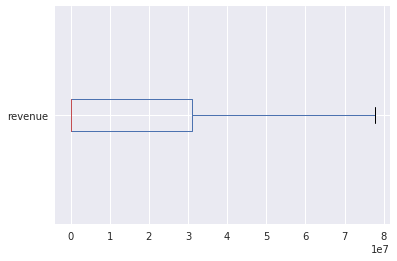

In [23]:
#visualizing distribution of Revenue
plot_box('revenue')

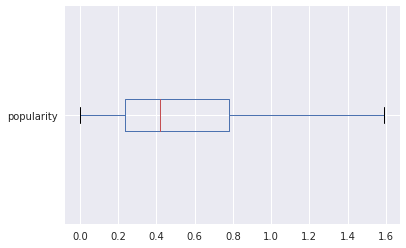

In [24]:
#visualizing distribution of Popularity

plot_box('popularity')

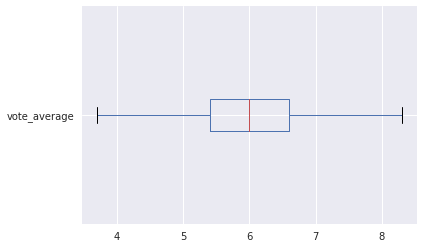

In [25]:
#visualizing distribution of rating

plot_box('vote_average')

### Lets look at the relationship between Revenue vs Popularity with Scatterplot

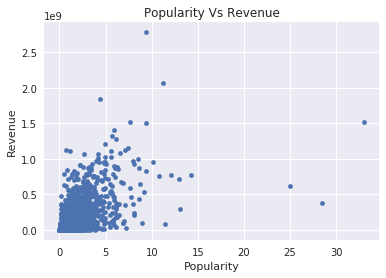

In [26]:
# Scatter plot of Revenue vs Popularity
movies_df.plot(x='popularity',y='revenue',kind='scatter')
plt.title('Popularity Vs Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue');

The above graph shows that Revenue increases with increase in popularity

### Lets look at the relationship between Popularity vs Rating with Scatterplot

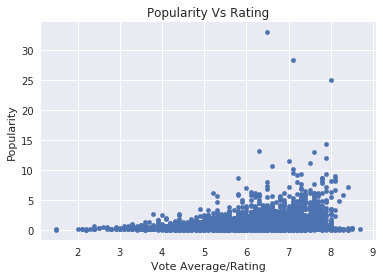

In [27]:
# Scatter plot of Popularity vs Ratings
movies_df.plot(x='vote_average',y='popularity',kind='scatter')
plt.title('Popularity Vs Rating')
plt.xlabel('Vote Average/Rating')
plt.ylabel('Popularity');

### Lets look at the relationship between Revenue vs Rating with Scatterplot

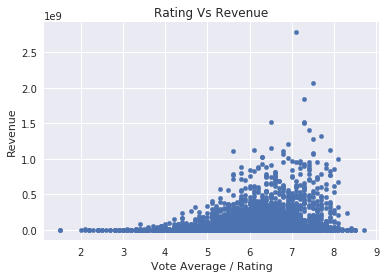

In [59]:
# Scatter plot of Revenue vs Ratings
movies_df.plot(x='vote_average',y='revenue',kind='scatter')
plt.title('Rating Vs Revenue')
plt.xlabel('Vote Average / Rating')
plt.ylabel('Revenue');

#### The relationship between Popularity Vs Rating and Rating Vs Revenue are <u>rightly-biased</u>

### Research Question 2: Which Movie has the highest Profit?

#### Firstly we need to calculate the profit for each of the movie

In [38]:
#calculate profit for each of the movie

movies_df['profit'] = movies_df['revenue']- movies_df['budget']
movies_df['profit'] = movies_df['profit'].apply(np.int64)
movies_df['budget'] = movies_df['budget'].apply(np.int64)
movies_df['revenue'] = movies_df['revenue'].apply(np.int64)


In [60]:
def top_12(col_name,size=12):
    #find the all times top 12 for a given column
    #sort the given column and select the top 12
    movies_df_sorted = pd.DataFrame(movies_df[col_name].sort_values(ascending=False))[:size]
    movies_df_sorted['original_title'] = movies_df['original_title']
    plt.figure(figsize=(10,5))
    #Calculate the avarage
    avg = np.mean(movies_df[col_name])   
    sns.barplot(x=col_name, y='original_title', data= movies_df_sorted, label=col_name)
    plt.axvline(avg, color='k', linestyle='--', label='mean')
    if (col_name == 'profit' or col_name == 'budget' or col_name == 'revenue'):
        plt.xlabel(col_name.capitalize() + ' (U.S Dollar)')
    else:
        plt.xlabel(col_name.capitalize())
    plt.ylabel('')
    plt.title('Top 12 Movies in: ' + col_name.capitalize())
    plt.legend()

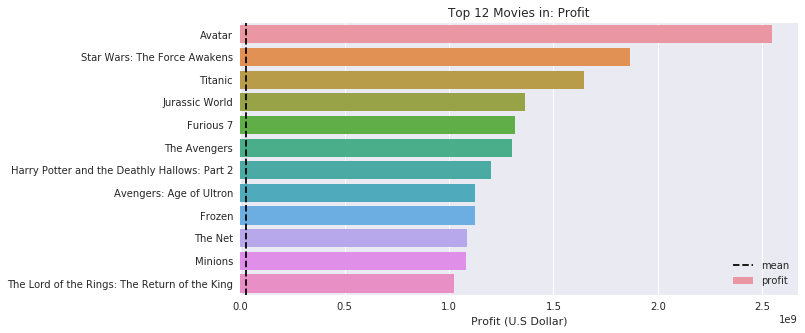

In [61]:
top_12('profit')

The above chart shows that Avatar movie earned the highest profit in all, of over 2.5B in Profit.

### Research Question 3  (Which genres was more used during the timelife of this dataset)

In [43]:
#check the minimum(lowest)release date i.e. the least date
print(movies_df['release_date'].min())

1972-01-01 00:00:00


1972 is the least date

To answer the question a function will be used. This function could take the column like genres,then count the values of these column to find out more filmed genres in this time of period.


In [44]:
from matplotlib import gridspec
def split_count_data(col_name, size=10):
    ##function which will take any column as argument from which data is need to be extracted and keep track of count
    #take a given column, and separate the string by '|'
    data = movies_df[col_name].str.cat(sep='|')
    #storing the values separately in the series
    data = pd.Series(data.split('|'))
    #Let's count the most frequenties values for given column
    count = data.value_counts(ascending=False)
    count_size = count.head(size)
    #Setting axis name for multiple names
    if (col_name == 'production_companies'):
        sp = col_name.split('_')
        axis_name = sp[0].capitalize()+' '+ sp[1].capitalize()
    else:
        axis_name = col_name.capitalize()
    fig = plt.figure(figsize=(14, 6))
    #set the subplot 
    gs = gridspec.GridSpec(1,2, width_ratios=[2,2])
    #count of given column on the bar plot
    ax0 = plt.subplot(gs[0])
    count_size.plot.barh()
    plt.xlabel('Number of Movies')
    plt.ylabel(axis_name)
    plt.title('The Most '+str(size)+' Filmed ' +axis_name+' Versus Number of Movies')
    ax = plt.subplot(gs[1])
    #setting the explode to adjust the pie chart explode variable to any given size
    explode = []
    total = 0
    for i in range(size):
         total = total + 0.015
         explode.append(total)
    #pie chart for given size and given column
    ax = count_size.plot.pie(autopct='%1.2f%%', shadow=True, startangle=0, pctdistance=0.9, explode=explode)
    plt.title('The most '+str(size)+' Filmed ' +axis_name+ ' in Pie Chart')
    plt.xlabel('')
    plt.ylabel('')
    plt.axis('equal')
    plt.legend(loc=9, bbox_to_anchor=(1.4, 1))

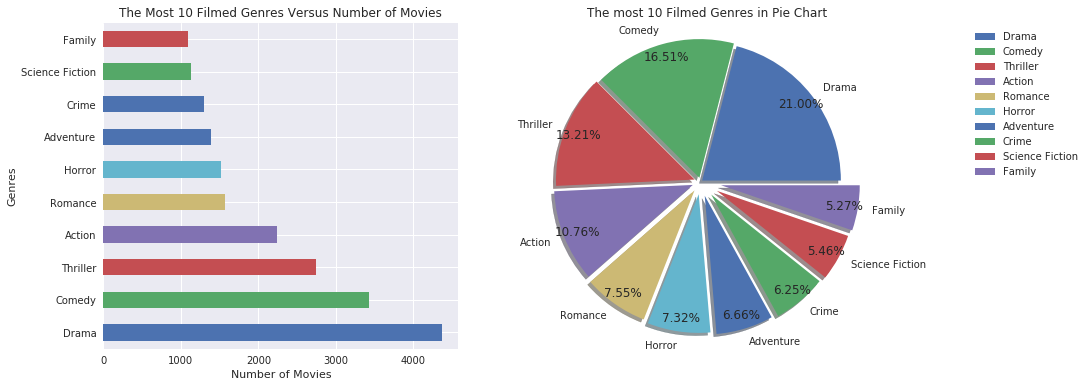

In [45]:
split_count_data("genres")

* The chart above shows that Drama is the most popular genre, followed by Comedy, Thriller and Action.
* Drame, Comedy, Thriller and Action are four most-made genres.

### Research Question 4 (Which Director has produced the best movies in 2015?)


In [46]:
#Returns max value for the column release year which is 2015
movies_df.loc[movies_df['release_year'].idxmax()]

id                                                                 135397
popularity                                                        32.9858
budget                                                          150000000
revenue                                                        1513528810
original_title                                             Jurassic World
cast                    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
director                                                  Colin Trevorrow
runtime                                                               124
genres                          Action|Adventure|Science Fiction|Thriller
production_companies    Universal Studios|Amblin Entertainment|Legenda...
release_date                                          2015-06-09 00:00:00
vote_count                                                           5562
vote_average                                                          6.5
release_year                          

In [47]:
# Filtering the dataset to movies released in 2015 alone
movies_df_dir=movies_df[movies_df['release_year'] == 2015]

Using groupby clause
let's **grouped** our df_dir dataframe **by** Director Names along with the mean of different movies released by them in 2015

In [48]:
#using groupby clause
director_data = movies_df_dir.groupby('director').mean().vote_average

In [61]:
# check the director_data dataframe
director_data

director
Aaron Hann|Mario Miscione         6.1
Aaron Keeling|Austin Keeling      3.8
Aaron Moorhead|Justin Benson      6.5
Adam Brooks|Matthew Kennedy       6.0
Adam Egypt Mortimer               3.9
Adam Green                        5.4
Adam MacDonald                    5.8
Adam Mason                        3.9
Adam Massey                       4.9
Adam McKay                        7.3
Adam Salky                        5.7
Adam Schindler                    5.8
Afonso Poyart                     6.2
Aisling Walsh                     7.8
Alan Taylor                       5.8
Alberto Marini                    5.3
Alec Gillis                       4.2
Alejandro AmenÃ¡bar               5.2
Alejandro GonzÃ¡lez IÃ±Ã¡rritu    7.2
Alejandro Monteverde              7.1
Aleksander Bach                   5.5
Alex Garcia Lopez                 4.5
Alex Garland                      7.6
Alex Gibney                       7.0
Alex Kalymnios                    6.3
Alex Kendrick                     6.9
Ale

In [49]:
#sort based on ratings
sort_dir = director_data.sort_values(ascending=False) 

In [63]:
sort_dir.head(8)

director
Andrew Jarecki       8.4
Don Hertzfeldt       8.2
Mark Neale           8.0
Pete Docter          8.0
Lenny Abrahamson     8.0
Douglas Mackinnon    8.0
Neil Armfield        7.9
Tom McCarthy         7.8
Name: vote_average, dtype: float64

Using BarChart
**let's visualize directors to their average ratings of movies released in 2015**

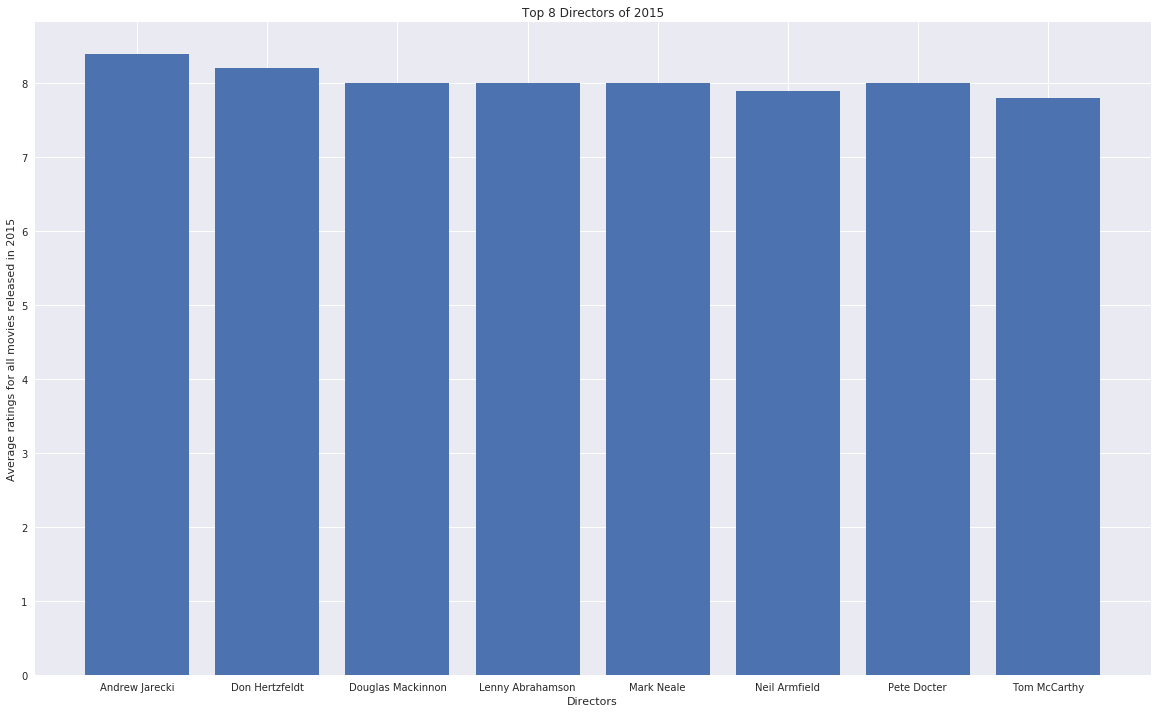

In [56]:
plt.subplots(figsize=(20,12))
plt.bar(sort_dir.index[:8],sort_dir[:8])
plt.title('Top 8 Directors of 2015')
plt.xlabel('Directors')
plt.ylabel('Average ratings for all movies released in 2015');

<a id='conclusions'></a>
## Conclusions

**Question 1**: from the various scatter plots, we can easily conclude that The Revenue increases with increase in Popularity,That makes Revenue and Popularity directly proportional. We also visualize the right-biased normal distributions for relationship between Revenue Vs Rating and Popularity Vs Rating.
> Limitations : Here the limitation faced was; Firstly there were many rows within the dataframe which contained a certain amount of null values. So, first I had to Drop those rows. Furthermore, the data also contained a duplicated value row (2090), which had to be removed, following a re-check of null values for our key parameters.

**Question 2**: Avatar movie Directed by James Cameron earn the highest profit in all, making over 2.5B in profit in this dataset followed by 'Star Wars' and 'Titanic' wich were the most profitable movies. 
> Limitations : Here I faced various limitations. There were no info about the profit of each movie but there was data about the revenue and the budget of each movie so, I derived the profit by Subtracting the revenue from Budget.

**Question 3** from the pie chart and the bar chart we could see
* Drama is the most popular genre, following by Comedy, Thriller and Action.
* Drame, Comedy, Thriller and Action are four most-made genres.
> Limitations : Here I faced various limitations. The data in the columns of (Directors, genres, production_companies) are sperated by '|', so I needed a function which will take any column as argument from which data is need to be extracted and keep track of count takeing a given column, and separate the string by '|' .

**Question 4** The top 8 Directors of 2015 where clearly shown based on the mean calculated for the average ratings of various movies released by them in 2015. so, we can conclude that, **'Andrew Jarecki'** with mean average rating of '8.4', wins, then comes 
* 'Don Hertzfeldt' with mean average rating of '8.2'.
* 'Mark Neale' with mean average rating of '8.0'.
* 'Pete Docter' with mean average rating of '8.0'.
* 'Lenny Abrahamson'with mean average rating of '8.0'.
* 'Douglas Mackinnon' with mean average rating of '8.0'
* 'Neil Armfield' with mean average rating of '7.9'
* 'Tom McCarthy' with mean average rating of '7.8'
> Limitations : Here I faced various limitations. Firstly there were many rows within the filtered dataframe containing data corresponding to movies released in 2015, having null values. So, first we had to drop those entries. also I didn't need many irrelevant fields present in the data but directors names and the ratings of their movies. So, I discarded the others fields.




In [64]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

### Citations
McKinney, W. (2018). Python for Data Analysis: Data Wrangling With pandas, numpy, and ipython (2nd ed.). Sebastopol, CA: OReilly Media.

Code for line of best fit of a scatter plot in python. (2015, August 15). Retrieved September 15, 2018, from https://stackoverflow.com/a/31800660

The online documentations of pandas, numpy, and matplotlib.

Thanks go to the Python for Data Analysis textbook for teaching most of the general concepts used in this report and to the above stackoverflow.com discussion 

Github: https://praxitelisk.github.io/DAND-P1-Investigate-a-Dataset/Investigate_a_Dataset.html